In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

print('numpy:', np.version.version)
print('pandas:', pd.__version__)
dataset = pd.read_csv("https://raw.githubusercontent.com/Baakchsu/LinearRegression/master/weight-height.csv")
dataset.columns
dataset = dataset.sample(frac=0.12)
df = dataset.copy().head(250)

numpy: 1.24.3
pandas: 2.0.3


In [2]:
gender_mapping = {'Male': 0, 'Female': 1}
# Map the values in the 'Gender' column using the mapping dictionary
df['Gender'] = df['Gender'].map(gender_mapping)
df["Weight"] = (df["Weight"]-df["Weight"].mean())/df["Weight"].std()#standardization of the dataset
df["Height"] = (df["Height"]-df["Height"].mean())/df["Height"].std() #standardization of the dataset

X = df[["Weight", "Gender"]]
y = df[["Height"]]
# df.shape
print(X.shape, y.shape)

(250, 2) (250, 1)


Linear Regression

In [3]:
class LinearRegression:
    def __init__(self, learning_rate=0.01, num_iterations=1000, tolerance=1e-4):
        self.learning_rate = learning_rate
        self.num_iterations = num_iterations
        self.tolerance = tolerance
        self.weights = None
        self.bias = None

    def cost_function_mae(self, y_predicted, y):
        # Mean Absolute Error (MAE)
        return np.mean(np.abs(y_predicted - y))
    
    def cost_function_mse(self, y_true, y_pred):
        # Mean Squared Error (MSE)
        return ((y_pred - y_true) ** 2).mean()
    
    # R-squared (R^2) score | Regression Metric
    def r_squared(self, y_predicted, y):
        # Calculate the sum of squared residuals
        ssr = np.sum((y - y_predicted) ** 2)
        # Calculate the total sum of squares
        sst = np.sum((y - np.mean(y)) ** 2)
        # Calculate R-squared
        r2 = 1 - (ssr / sst)
        
        return r2
    
    def gradient_descent(self, X, y):
        num_samples = len(X)
        cost_history = []
        bias_history = []
        weight_history = []
        prev_cost = 0
        
        for _ in range(self.num_iterations + 1):
            # Linear equation: y = wx + b
            y_predicted = np.dot(X, self.weights) + self.bias
            # print("y_predicted:", y_predicted)
            # Cost function
            cost = self.cost_function_mae(y_predicted, y.values)
            cost_history.append(cost)
            # print("Cost: ",cost)
            # Compute gradients
            dw = (1 / num_samples) * np.dot(X.T, np.sign(y_predicted - y.values))  # Gradient for Error
            db = (1 / num_samples) * np.sum(np.sign(y_predicted - y.values))  # Gradient for Error

            bias_history.append(self.bias)
            weight_history.append(self.weights)
            # Update parameters using gradient descent
            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db
            # print("Bias:- ", self.bias)

            # Print cost to monitor convergence
            if _ % 50 == 0:
                print(f"Iteration {_}: CostFuntion = {cost:.5f}")
            
            # Check for convergence using change in cost
            if self.num_iterations > 0 and abs(cost - prev_cost) < self.tolerance:
                print(f"Converged after {_} iterations.")
                break

            prev_cost = cost

            model_data = {
                "biases": bias_history,
                "weights": weight_history,
                "cost": cost_history
            }

        return self.weights, self.bias, model_data

    def fit(self, X, y):
        num_samples, num_features = X.shape

        # Initialize weights and bias
        self.weights = np.random.normal(0,1, (num_features, 1))  # Reshaped to (num_features, 1)
        self.bias = 0

        # Gradient Descent for convergence
        weight, bias, model_data = self.gradient_descent(X, y)
                
        # Calculate R-squared
        y_predicted = np.dot(X, weight) + bias
        r2_score = self.r_squared(y_predicted, y.values)
        print(f"R-squared Metric: {r2_score:.4f}")
        print("Final Wight:",weight, "\nFinal Bias:", bias)
        return weight, bias, model_data

    def predict(self, X):
        return np.dot(X, self.weights) + self.bias

# Example usage:
model = LinearRegression(learning_rate=0.01, num_iterations=1000)
weights, biases, model_data = model.fit(X, y)

Iteration 0: CostFuntion = 0.53033
Iteration 50: CostFuntion = 0.34242
Iteration 100: CostFuntion = 0.31545
Converged after 109 iterations.
R-squared Metric: 0.8473
Final Wight: [[0.84288735]
 [0.0235935 ]] 
Final Bias: 0.005839999999999999


Plots for Simple Linear Regression

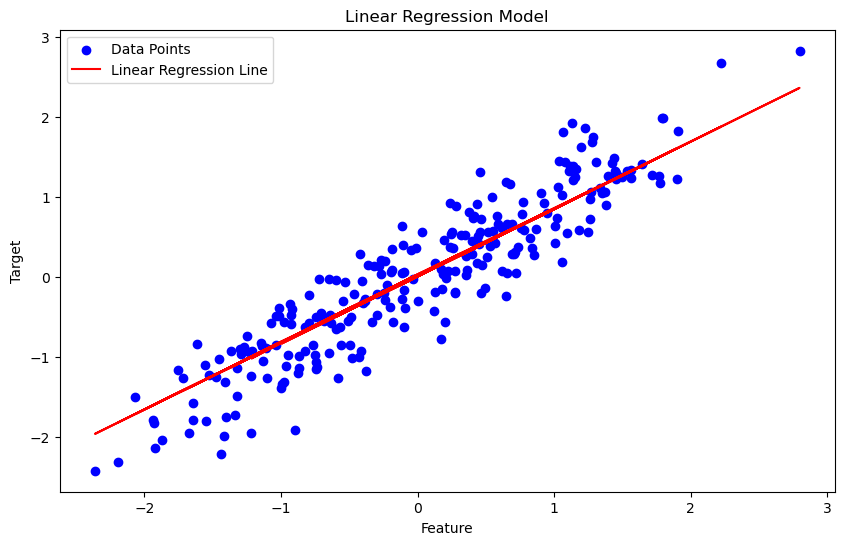

In [4]:
#Plots
plt.figure(figsize=(10, 6))
# Plot the data points
plt.scatter(X["Weight"], y, label='Data Points', c='blue')

# Plot the linear regression line
y_pred = np.squeeze(model.predict(X))
plt.plot(X["Weight"], y_pred, label='Linear Regression Line', c='red')
# Add labels and a legend
plt.xlabel('Weight')
plt.ylabel('Target')
plt.legend()
# Show the plot
plt.title('Linear Regression Model')
plt.show()

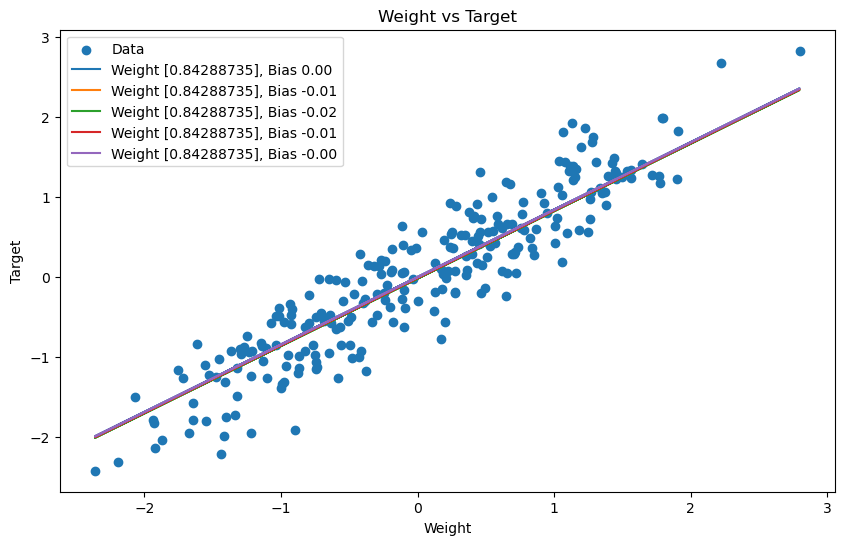

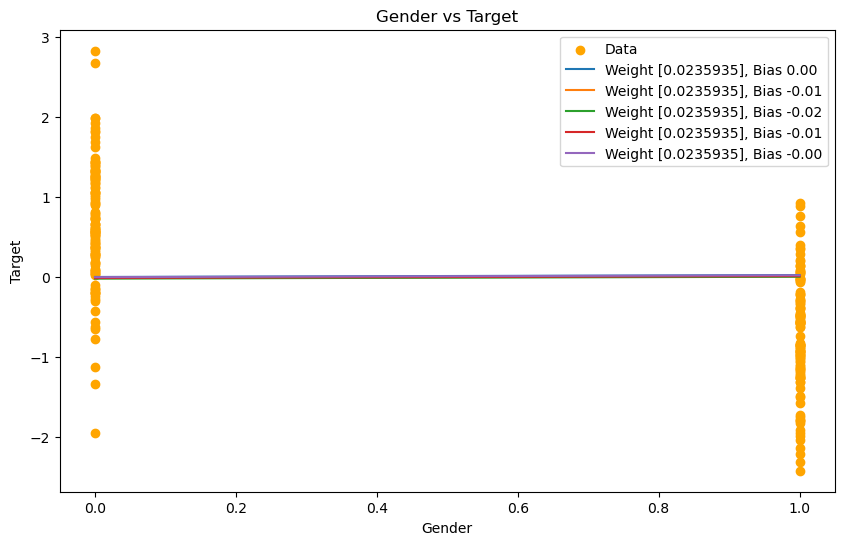

In [5]:
# Plot for all weights and bias for 1st featture
plt.figure(figsize=(10, 6))
plt.scatter(X[["Weight"]], y, label='Data')

feature1 = "Weight"
feature2 = "Gender"
num_of_weights = len(model_data["weights"])
# Plot predictions for various weights and biases
for i in range(0, num_of_weights,int(num_of_weights*0.20)):
    weight = model_data["weights"][i][0]
    bias = model_data["biases"][i]

    # print(np.array(weight).shape)
    # Calculate predictions for the given weight and bias
    prediction = np.dot(X[["Weight"]], weight) + bias  # Use only the first column of X

    # Plot the predictions
    plt.plot(X[["Weight"]], prediction, label=f'Weight {weight}, Bias {bias:.2f}')
plt.title("Weight vs Target")
plt.xlabel('Weight')
plt.ylabel('Target')
plt.legend()
plt.show()

# Plot for all weights and bias for 2nd featture
plt.figure(figsize=(10, 6))
plt.scatter(X[["Gender"]], y, label='Data', c="orange")
for i in range(0, num_of_weights,int(num_of_weights*0.20)):
    weight = model_data["weights"][i][1]
    bias = model_data["biases"][i]

    # print(np.array(weight).shape)
    # Calculate predictions for the given weight and bias
    prediction = np.dot(X[["Gender"]], weight) + bias  # Use only the first column of X

    # Plot the predictions
    plt.plot(X[["Gender"]], prediction, label=f'Weight {weight}, Bias {bias:.2f}')
plt.title("Gender vs Target")
plt.xlabel('Gender')
plt.ylabel('Target')
plt.legend()
plt.show()

c:\Users\1000059312\Python\Miniconda3\envs\ml-algo\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


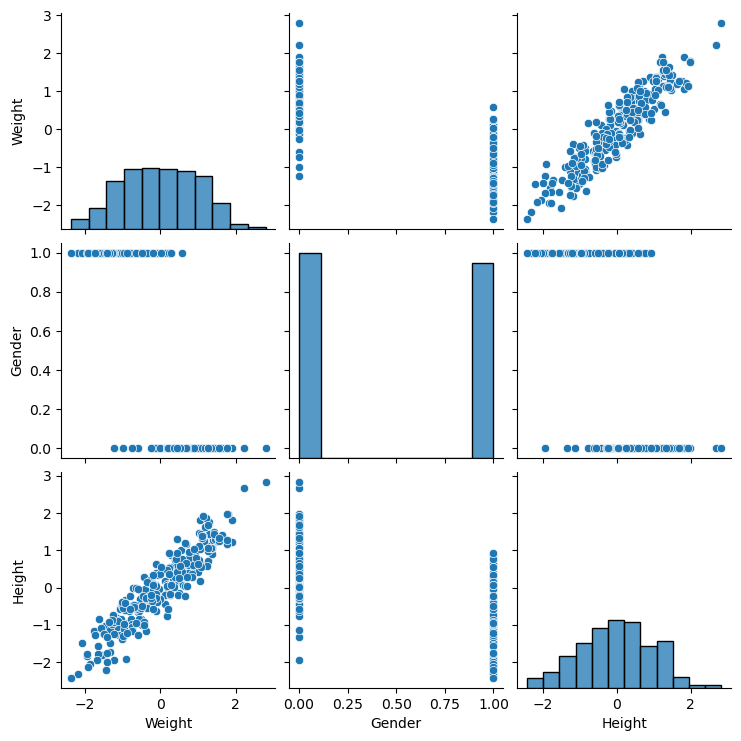

In [6]:
# Seaborn Pairplot
import matplotlib.pyplot as plt
import seaborn as sns
# Create a pairplot to visualize relationships between features
data = X.copy()
data['Height'] = y
sns.pairplot(data, kind='scatter', diag_kind='hist')
plt.show()
